In [4]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.manifold import TSNE
from sklearn.decomposition import DictionaryLearning
import matplotlib.pyplot as plt

print("Loading data...")
X_train = np.load('processed_data/X_train.npy')
X_test = np.load('processed_data/X_test.npy')
y_train = np.load('processed_data/y_train.npy')
y_test = np.load('processed_data/y_test.npy')
print("Data loaded.\n")

best_C = 0.001

Loading data...
Data loaded.



In [9]:
# 使用t-SNE进行特征学习
embedding_size = 2
print("Reduce the dimensionality to {} using t-SNE...".format(embedding_size))
tsne = TSNE(n_components=embedding_size, random_state=42)
X_tsne = tsne.fit_transform(np.vstack((X_train, X_test)))
X_train_tsne = X_tsne[:len(X_train)]
X_test_tsne = X_tsne[len(X_train):]

Reduce the dimensionality to 2 using t-SNE...


In [ ]:
# 存储t-SNE降维后的数据
np.save('processed_data/X_train_tsne.npy', X_train_tsne)
np.save('processed_data/X_test_tsne.npy', X_test_tsne)
print("Data saved.\n")

Data saved.



In [ ]:
# 可视化
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.title("Train data")
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='tab10')
plt.subplot(122)
plt.title("Test data")
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=y_test, cmap='tab10')
plt.show()


In [19]:
data = {
    'Dimensionality': [8, 16, 32, 64, 128, 256, 512, 1024, 2048],
    'ANOVA': [34.45, 50.26, 72.86, 83.47, 88.25, 90.94, 92.31, 92.84,93.29],
    'chi2': [30.85, 49.01, 72.78, 83.46, 88.86, 91.43, 92.56, 93.06, 93.29],
    'PFE': [40.95, 63.11, 77.82, 86.05, 90.28, 91.84, 92.67, 93.14, 93.29],
    'linear PCA': [73.14, 84.80, 90.16, 92.01, 92.72, 92.85, 93.13, 93.25, 93.29],
    'LDA': [62.09, 78.81, 89.80, None, None, None, None, None, None],
    'Sparse Coding': [None, 68.73, 81.58, 87.70, 90.39, 91.72, None, None, 93.29],
    't-SNE': [None, None, None, None, None, None, None, None,93.29]  # Only one value provided for t-SNE
}

# Adding the provided t-SNE accuracy for 2 dimensions
data['Dimensionality'].insert(0, 2)  # Inserting the dimensionality at the beginning
data['t-SNE'].insert(0, 86.76)  # Inserting the t-SNE accuracy at the beginning
# Inserting None for the rest of the methods at the 2 dimensions row
for method in ['ANOVA', 'chi2', 'PFE', 'linear PCA', 'LDA', 'Sparse Coding']:
    data[method].insert(0, None)

# Now creating the DataFrame
df = pd.DataFrame(data)

# Filling the missing values for better LaTeX table generation
df_filled = df.fillna('-')  # Re

display(df_filled)


,Dimensionality,ANOVA,chi2,PFE,linear PCA,LDA,Sparse Coding,t-SNE
0,2,-,-,-,-,-,-,86.76
1,8,34.45,30.85,40.95,73.14,62.09,-,-
2,16,50.26,49.01,63.11,84.8,78.81,68.73,-
3,32,72.86,72.78,77.82,90.16,89.8,81.58,-
4,64,83.47,83.46,86.05,92.01,-,87.7,-
5,128,88.25,88.86,90.28,92.72,-,90.39,-
6,256,90.94,91.43,91.84,92.85,-,91.72,-
7,512,92.31,92.56,92.67,93.13,-,-,-
8,1024,92.84,93.06,93.14,93.25,-,-,-
9,2048,93.29,93.29,93.29,93.29,-,93.29,93.29


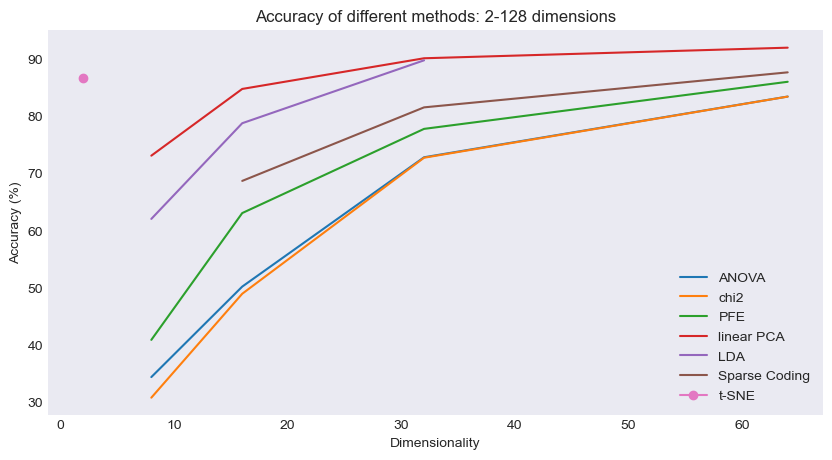

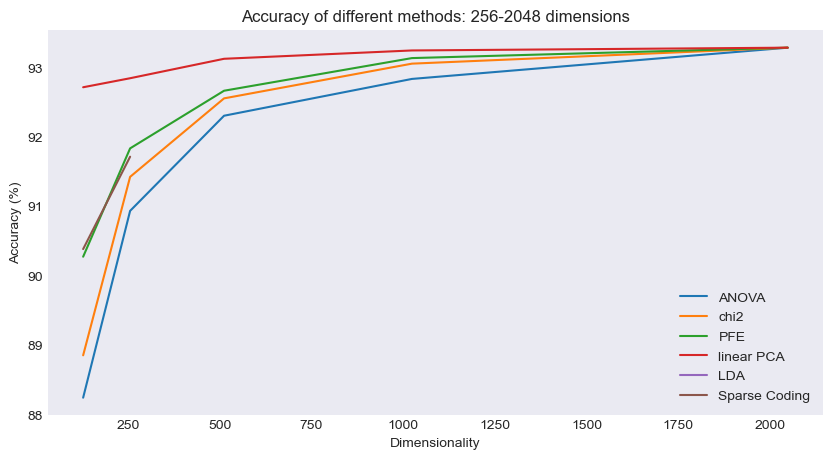

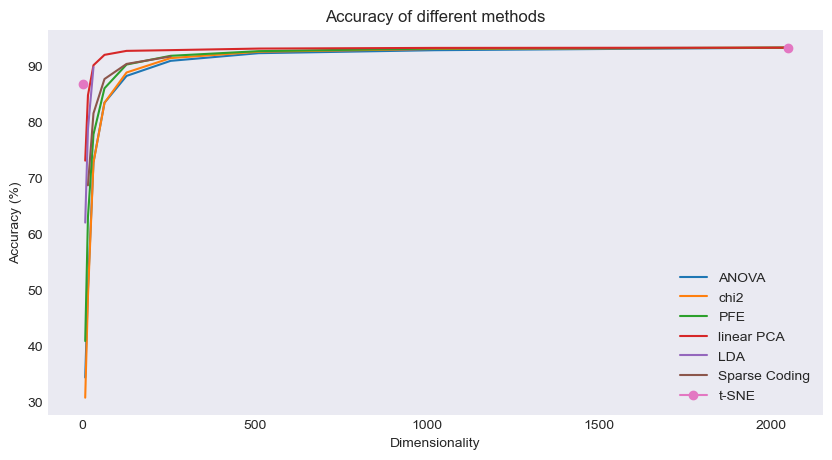

In [22]:
# 划分成两段，2-128和256-2048，分别绘制折线图
plt.figure(figsize=(10, 5))
plt.plot(df['Dimensionality'][:5], df['ANOVA'][:5], label='ANOVA')
plt.plot(df['Dimensionality'][:5], df['chi2'][:5], label='chi2')
plt.plot(df['Dimensionality'][:5], df['PFE'][:5], label='PFE')
plt.plot(df['Dimensionality'][:5], df['linear PCA'][:5], label='linear PCA')
plt.plot(df['Dimensionality'][:5], df['LDA'][:5], label='LDA')
plt.plot(df['Dimensionality'][:5], df['Sparse Coding'][:5], label='Sparse Coding')
plt.plot(df['Dimensionality'][:5], df['t-SNE'][:5], label='t-SNE', marker='o')
plt.xlabel('Dimensionality')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of different methods: 2-128 dimensions')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(df['Dimensionality'][5:], df['ANOVA'][5:], label='ANOVA')
plt.plot(df['Dimensionality'][5:], df['chi2'][5:], label='chi2')
plt.plot(df['Dimensionality'][5:], df['PFE'][5:], label='PFE')
plt.plot(df['Dimensionality'][5:], df['linear PCA'][5:], label='linear PCA')
plt.plot(df['Dimensionality'][5:], df['LDA'][5:], label='LDA')
plt.plot(df['Dimensionality'][5:], df['Sparse Coding'][5:], label='Sparse Coding') 
plt.xlabel('Dimensionality')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of different methods: 256-2048 dimensions')
plt.legend()
plt.grid()
plt.show()

# 合起来
plt.figure(figsize=(10, 5))
plt.plot(df['Dimensionality'], df['ANOVA'], label='ANOVA')
plt.plot(df['Dimensionality'], df['chi2'], label='chi2')
plt.plot(df['Dimensionality'], df['PFE'], label='PFE')
plt.plot(df['Dimensionality'], df['linear PCA'], label='linear PCA')
plt.plot(df['Dimensionality'], df['LDA'], label='LDA')
plt.plot(df['Dimensionality'], df['Sparse Coding'], label='Sparse Coding')
plt.plot(df['Dimensionality'], df['t-SNE'], label='t-SNE', marker='o')
plt.xlabel('Dimensionality')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of different methods')
plt.legend()
plt.grid()
plt.show()

